# mango-python-alignment

In [1]:
import os
################ For testing purposes only ################
try:
   testMode
except NameError:
   testMode = False

try:
    alignmentFile
except NameError:
   # NOTE: this is for a local example. Based on file placement, you may have to change this path
    alignmentFile = os.getcwd() + "/../../example-files/chr17.7500000-7515000.sam.adam"

In [2]:
from bdgenomics.adam.adamContext import ADAMContext
from bdgenomics.adam.rdd import AlignmentRecordRDD, CoverageRDD

from bdgenomics.mango.QC import  AlignmentDistribution

In [3]:
try:
    spark
except NameError:
    from pyspark.sql import SparkSession
    spark = SparkSession.builder.master("local").getOrCreate()
try:
   ac
except NameError:
   ac = ADAMContext(spark)

# load file
alignment = ac.loadAlignments(alignmentFile)

In [4]:
ad = AlignmentDistribution(spark, alignment, bin_size=500)

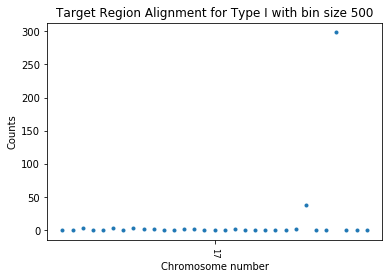

In [5]:
results = ad.plot(plotType="I", testMode=testMode)